<a href="https://colab.research.google.com/github/jaimesierrab/Challenge-Amigo-secreto/blob/master/IA_aplicada_a_ciencia_de_datos_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Versión realizada con ChatGPT#

##1.1 Importando las Bibliotecas##

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

##1.2 Obteniendo los Datos##

In [3]:
url_clientes = "https://gist.githubusercontent.com/ahcamachod/d08898e1cc84c7271856e78d9558ca3d/raw/2f7e1fa53711efe6433a5c5ec79948f600591cb9/clientes_zoop.csv"
url_ventas = "https://gist.githubusercontent.com/ahcamachod/966d7162a3c3a2769b8770b35abf1bcc/raw/d79941b3fa46a450f3611589abd8663399c1277b/ventas_zoop.csv"

## Haciendo los DataFrames##

###DataFrame de clientes###

In [4]:
clientes = pd.read_csv(url_clientes)
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


###DataFrame de ventas (tail)###

In [5]:
ventas = pd.read_csv(url_ventas)
ventas.tail()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
6164,6141,2023-12-31,17:49,Electrodomésticos,1509.9,5,377.48,Tarjeta de Crédito
6165,6148,2023-12-31,23:02,Papelería y oficina,14.0,2,3.36,Transferencia
6166,6123,2023-12-31,21:25,Alimentos y bebidas,77.9,1,7.79,Tarjeta de Crédito
6167,6147,2023-12-31,21:38,Libros,142.9,4,17.15,Tarjeta de Crédito
6168,6122,2023-12-31,22:11,Belleza e higiene,89.9,5,13.48,Tarjeta de Crédito


##Ejercicios con base de datos de clientes##

In [6]:
# Dimensión del dataframe
clientes.shape

(6169, 9)

####DataFrame de clientes####

In [7]:
# Primeras filas del dataframe
clientes.head()

,ID_compra,ID_cliente,ciudad,estado,region,edad,sexo_biologico,cashback,nota
0,904,8972,Oaxaca de Juárez,Oaxaca,Sur,49,Masculino,No,9
1,4613,5120,Ciudad de México,Ciudad de México,Centro,49,Femenino,No,9
2,5579,1847,Ciudad de México,Ciudad de México,Centro,24,Femenino,No,8
3,2405,2846,Ciudad de México,Ciudad de México,Centro,38,Femenino,Sí,7
4,2485,2715,Chihuahua,Chihuahua,Noroeste,30,Femenino,No,10


In [8]:
# Tipos de datos de cada columna
clientes.dtypes

,0
ID_compra,int64
ID_cliente,int64
ciudad,object
estado,object
region,object
edad,int64
sexo_biologico,object
cashback,object
nota,int64


In [9]:
# Información general del dataframe
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID_compra       6169 non-null   int64 
 1   ID_cliente      6169 non-null   int64 
 2   ciudad          6169 non-null   object
 3   estado          6169 non-null   object
 4   region          6169 non-null   object
 5   edad            6169 non-null   int64 
 6   sexo_biologico  6169 non-null   object
 7   cashback        6169 non-null   object
 8   nota            6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [10]:
# Estadísticas descriptivas de columnas numéricas (edad y calificación)
clientes[['edad', 'nota']].describe()

,edad,nota
count,6169.000000,6169.000000
mean,38.260010,8.443670
std,9.838951,1.730584
min,18.000000,0.000000
25%,31.000000,8.000000
50%,38.000000,9.000000
75%,45.000000,9.000000
max,70.000000,10.000000


In [11]:
# Distribución de valores únicos por columna categórica
clientes['sexo_biologico'].value_counts()
clientes['cashback'].value_counts()
clientes['region'].value_counts()
clientes['estado'].value_counts()
clientes['ciudad'].nunique()  # cuántas ciudades diferentes hay

94

In [12]:
# Verificar si hay valores nulos (aunque se dijo que ya está limpio, es buena práctica confirmar)
clientes.isnull().sum()

,0
ID_compra,0
ID_cliente,0
ciudad,0
estado,0
region,0
edad,0
sexo_biologico,0
cashback,0
nota,0


In [13]:
#Resumen estadístico de las columnas numéricas
clientes.describe()

,ID_compra,ID_cliente,edad,nota
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [14]:
#Verificar valores únicos y contar las frecuencias de columnas categóricas
clientes['sexo_biologico'].value_counts()

,count
sexo_biologico,
Femenino,3371
Masculino,2798


In [15]:
clientes['cashback'].value_counts()

,count
cashback,
No,3557
Sí,2612


##Ejercicios con base de datos de ventas##

In [16]:
# Dimensión del dataframe
ventas.shape

(6169, 8)

####DataFrame de ventas####

In [17]:
# Primeras filas del dataframe
ventas.head()

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia


In [18]:
# Tipos de datos de cada columna
ventas.dtypes

,0
ID_compra,int64
fecha,object
horario,object
categoria,object
precio_unitario,float64
cantidad,int64
envio,float64
metodo_pago,object


In [19]:
# Información general del dataframe
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_compra        6169 non-null   int64  
 1   fecha            6169 non-null   object 
 2   horario          6169 non-null   object 
 3   categoria        6169 non-null   object 
 4   precio_unitario  6169 non-null   float64
 5   cantidad         6169 non-null   int64  
 6   envio            6169 non-null   float64
 7   metodo_pago      6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [20]:
# Estadísticas descriptivas de columnas numéricas (edad y calificación)
ventas[['horario', 'categoria']].describe()

,horario,categoria
count,6169,6169
unique,659,8
top,23:56,Alimentos y bebidas
freq,26,1495


In [21]:
# Distribución de valores únicos por columna categórica
ventas['fecha'].value_counts()
ventas['horario'].value_counts()
ventas['categoria'].value_counts()
ventas['precio_unitario'].value_counts()
ventas['cantidad'].value_counts()
ventas['envio'].value_counts()
ventas['metodo_pago'].nunique()

4

In [22]:
# Verificar si hay valores nulos (aunque se dijo que ya está limpio, es buena práctica confirmar)
ventas.isnull().sum()

,0
ID_compra,0
fecha,0
horario,0
categoria,0
precio_unitario,0
cantidad,0
envio,0
metodo_pago,0


####Convertir la columna de fecha a tipo datetime####

In [23]:
#Convertir la columna de fecha a tipo datetime y analizar.
ventas['fecha'] = pd.to_datetime(ventas['fecha'], format='%Y-%m-%d')

In [24]:
ventas.describe()

,ID_compra,fecha,precio_unitario,cantidad,envio
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


##Tipos de gráficos##
Ya hemos explorado un poco de las dos bases del proyecto y obtuvimos algunos insights interesantes que pueden ser importantes en la construcción de nuestras visualizaciones.

Ahora, intentemos simplificar nuestro análisis consolidando los datos en una única tabla para, a partir de ahí, enfocarnos en las posibilidades de visuales combinando los datos. ¿Podrá GPT ayudarnos aquí?

In [25]:
# prompt: Ahora vamos a unir las dos bases de nuestro proyecto en una sola utilizando como llave la columna "ID_compra". Además, organizaremos las columnas en la siguiente secuencia:
# ID_compra
# fecha
# horario
# categoria
# precio_unitario
# cantidad
# envio
# metodo_pago
# ID_cliente
# edad
# sexo_biologico
# ciudad
# estado
# region
# cashback
# nota
# Construye un código para ejecutar esta etapa usando Python y la biblioteca Pandas.

# Unir los dos DataFrames usando la columna 'ID_compra'
df_unido = pd.merge(ventas, clientes, on='ID_compra', how='inner')

# Definir el orden deseado de las columnas
df_unido = df_unido[['ID_compra','fecha','horario', 'categoria', 'precio_unitario', 'cantidad', 'envio',
                      'metodo_pago', 'ID_cliente', 'edad', 'sexo_biologico', 'ciudad', 'estado', 'region',
                      'cashback', 'nota']]

# Reorganizar las columnas en el DataFrame unido
#df_unido = df_unido[orden_columnas]
# Mostrar las primeras filas del DataFrame unido para verificar
(df_unido.head())
# Mostrar información general del DataFrame unido

,ID_compra,fecha,horario,categoria,precio_unitario,cantidad,envio,metodo_pago,ID_cliente,edad,sexo_biologico,ciudad,estado,region,cashback,nota
0,6,2023-01-03,20:40,Electrónicos,4457.9,4,713.26,Paypal,6149,30,Masculino,Hermosillo,Sonora,Noroeste,Sí,10
1,5,2023-01-03,21:48,Herramientas y construcción,115.9,1,0.00,Transferencia,9491,36,Masculino,Ciudad de México,Ciudad de México,Centro,Sí,8
2,9,2023-01-03,17:08,Belleza e higiene,68.9,2,13.78,Tarjeta de Crédito,5288,39,Femenino,Aguascalientes,Aguascalientes,Centro-Norte,No,7
3,4,2023-01-03,14:29,Herramientas y construcción,80.9,5,40.45,Transferencia,9679,35,Masculino,Veracruz,Veracruz,Golfo,Sí,9
4,8,2023-01-03,18:02,Belleza e higiene,165.0,4,0.00,Transferencia,1380,50,Masculino,Ciudad de México,Ciudad de México,Centro,No,9


In [26]:
# Mostrar las primeras filas del DataFrame final para verificar el resultado
#print
#df_final.head()
#código inútil

In [43]:
#código inputil
# Mostrar la información del DataFrame final para verificar los tipos de datos y el número de filas/columnas
#print(df_final.info())

In [44]:
df_unido.columns

Index(['ID_compra', 'fecha', 'horario', 'categoria', 'precio_unitario',
       'cantidad', 'envio', 'metodo_pago', 'ID_cliente', 'edad',
       'sexo_biologico', 'ciudad', 'estado', 'region', 'cashback', 'nota',
       'facturacion', 'mes'],
      dtype='object')

In [29]:
# prompt: Ahora con nuestro "df" ya construido a partir de las dos bases del proyecto, vamos a iniciar un nuevo proceso. Queremos comenzar la etapa de generación de visuales que puedan ayudar en el análisis de la facturación a lo largo del año, el perfil del cliente y otros datos que puedan ser relevantes para el análisis y la construcción de nuestra narrativa.
# Las columnas de "df" son:
# ID_compra: número único asignado a la compra realizada, en formato int
# fecha: fecha de la compra, en formato datetime
# horario: hora de la compra, en formato object
# categoria: categoría del producto, en formato object
# precio_unitario: precio de una unidad del producto, en formato float
# cantidad: cantidad vendida del producto, en formato int
# envio: costo de envío a ser pagado en total de la compra, en formato float
# metodo_pago: método de pago de la compra, en formato object
# ID_cliente: número único asignado al cliente, en formato int
# edad: edad del cliente, en formato int
# sexo_biologico: sexo biológico del cliente, en formato object
# ciudad: ciudad del cliente, en formato object
# estado: estado del cliente, en formato object
# region: región del cliente, en formato object
# cashback: si el cliente participa o no en el programa de cashback de la tienda, en formato object
# nota: evaluación del cliente por la compra, en formato int
# El objetivo es abstraer y buscar relaciones para construir visualizaciones interesantes para el análisis de los datos de los clientes y ventas de Zoop.
# Con base en la información proporcionada, ¿qué tipos de visualizaciones serían útiles para alcanzar el objetivo de analizar los datos?

Dado el DataFrame `df_unido` con las columnas especificadas, varias visualizaciones pueden ser útiles para analizar la facturación, el perfil del cliente y otros datos relevantes. Aquí hay algunas sugerencias, categorizadas por el tipo de análisis:

**Análisis de Facturación y Ventas:**

1.  **Serie temporal de Ventas Totales (o por Categoría/Región):** Un gráfico de líneas que muestre la suma del "precio_unitario * cantidad + envio" a lo largo del tiempo (diario, semanal o mensual). Esto ayudará a identificar tendencias, estacionalidad y picos de ventas. Se puede segmentar por "categoria" o "region" para ver el rendimiento de diferentes segmentos.
    *   **Visualización:** Gráfico de líneas.
    *   **Columnas a usar:** `fecha`, `precio_unitario`, `cantidad`, `envio`, (opcionalmente `categoria`, `region`).

2.  **Distribución de los Métodos de Pago:** Un gráfico de barras o de pastel que muestre la proporción de ventas por "metodo_pago". Esto indicará qué métodos son más populares y podrían ser relevantes para estrategias de marketing o promociones.
    *   **Visualización:** Gráfico de barras o de pastel.
    *   **Columnas a usar:** `metodo_pago`.

3.  **Ventas por Categoría de Producto:** Un gráfico de barras que muestre el total de ventas (o la cantidad vendida) por "categoria". Esto ayudará a identificar las categorías de productos más exitosas.
    *   **Visualización:** Gráfico de barras.
    *   **Columnas a usar:** `categoria`, `precio_unitario`, `cantidad`, `envio`.

4.  **Distribución de Cantidades Vendidas:** Un histograma de la columna "cantidad" para entender cuántas unidades se compran típicamente por transacción.
    *   **Visualización:** Histograma.
    *   **Columnas a usar:** `cantidad`.

5.  **Distribución de Precios Unitarios:** Un histograma de la columna "precio_unitario" para entender el rango de precios de los productos vendidos.
    *   **Visualización:** Histograma.
    *   **Columnas a usar:** `precio_unitario`.

6.  **Ventas por Horario del Día:** Un gráfico de barras o de líneas que muestre el total de ventas por "horario". Esto podría identificar los momentos del día con mayor actividad de compra.
    *   **Visualización:** Gráfico de barras o de líneas.
    *   **Columnas a usar:** `horario`, `precio_unitario`, `cantidad`, `envio`.

**Análisis del Perfil del Cliente:**

7.  **Distribución de Edades de los Clientes:** Un histograma o gráfico de densidad de la columna "edad" para entender la distribución de edades de los clientes.
    *   **Visualización:** Histograma o gráfico de densidad.
    *   **Columnas a usar:** `edad`.

8.  **Distribución de Clientes por Sexo Biológico:** Un gráfico de barras o de pastel que muestre la proporción de clientes por "sexo_biologico".
    *   **Visualización:** Gráfico de barras o de pastel.
    *   **Columnas a usar:** `sexo_biologico`.

9.  **Distribución de Clientes por Región/Estado/Ciudad:** Gráficos de barras que muestren la cantidad de clientes por "region", "estado" y, si hay un número manejable de ciudades, por "ciudad". Esto ayuda a entender la distribución geográfica de la base de clientes.
    *   **Visualización:** Gráfico de barras.
    *   **Columnas a usar:** `region`, `estado`, `ciudad`.

10. **Proporción de Clientes en el Programa de Cashback:** Un gráfico de pastel o de barras que muestre la proporción de clientes que participan en el programa de "cashback".
    *   **Visualización:** Gráfico de pastel o de barras.
    *   **Columnas a usar:** `cashback`.

11. **Distribución de las Notas (Calificaciones):** Un gráfico de barras que muestre la frecuencia de cada "nota" recibida por las compras. Esto indicará la satisfacción general del cliente.
    *   **Visualización:** Gráfico de barras.
    *   **Columnas a usar:** `nota`.

**Relaciones entre Ventas y Perfil del Cliente:**

12. **Ventas por Grupo de Edad:** Un gráfico de barras que muestre el total de ventas (o el número de compras) por grupos de edad (por ejemplo, rangos de 10 años). Esto podría identificar los grupos de edad que generan más ingresos.
    *   **Visualización:** Gráfico de barras.
    *   **Columnas a usar:** `edad`, `precio_unitario`, `cantidad`, `envio`.

13. **Ventas por Región/Estado/Ciudad:** Mapas de calor o gráficos de barras que muestren las ventas totales (o promedio por cliente) por "region", "estado" o "ciudad". Esto podría resaltar las áreas geográficas con mayor potencial de ventas.
    *   **Visualización:** Mapa de calor, gráfico de barras.
    *   **Columnas a usar:** `region`, `estado`, `ciudad`, `precio_unitario`, `cantidad`, `envio`.

14. **Ventas por Sexo Biológico:** Un gráfico de barras que compare las ventas totales (o promedio por cliente) entre los diferentes "sexo_biologico".
    *   **Visualización:** Gráfico de barras.
    *   **Columnas a usar:** `sexo_biologico`, `precio_unitario`, `cantidad`, `envio`.

15. **Impacto del Cashback en las Ventas/Nota:** Comparar las ventas promedio o la "nota" promedio entre clientes que participan en el "cashback" y los que no. Esto puede hacerse con gráficos de barras comparativos o box plots.
    *   **Visualización:** Gráficos de barras comparativos, Box plots.
    *   **Columnas a usar:** `cashback`, `precio_unitario`, `cantidad`, `envio`, `nota`.

16. **Método de Pago Preferido por Grupo Demográfico:** Analizar si ciertos "metodo_pago" son más populares entre determinados grupos de edad, "sexo_biologico" o "region". Esto podría representarse con gráficos de barras apiladas o agrupadas.
    *   **Visualización:** Gráficos de barras apiladas o agrupadas.
    *   **Columnas a usar:** `metodo_pago`, `edad`, `sexo_biologico`, `region`.

**Visualizaciones de Relación:**

17. **Precio Unitario vs. Cantidad:** Un gráfico de dispersión para ver si hay alguna relación entre el "precio_unitario" y la "cantidad" comprada.
    *   **Visualización:** Gráfico de dispersión.
    *   **Columnas a usar:** `precio_unitario`, `cantidad`.

18. **Edad vs. Nota:** Un gráfico de dispersión o box plots por rango de edad para ver si la "edad" del cliente está relacionada con la "nota" que dan.
    *   **Visualización:** Gráfico de dispersión, Box plots.
    *   **Columnas a usar:** `edad`, `nota`.

**Consideraciones Adicionales:**

*   **Librerías:** Para crear estas visualizaciones, serán útiles librerías como `matplotlib.pyplot` y `seaborn` en Python.
*   **Interactividad:** Para un análisis más profundo, las visualizaciones interactivas usando librerías como `plotly` o `altair` podrían ser muy beneficiosas, permitiendo filtrar por categoría, región, etc.
*   **KPIs (Indicadores Clave de Rendimiento):** Definir métricas claras (como Ingreso Total, Ingreso Promedio por Cliente, Tasa de Participación en Cashback, etc.) ayudará a enfocar las visualizaciones.
*   **Segmentación:** Segmentar el análisis por diferentes dimensiones (como categoría de producto, región, método de pago) es clave para descubrir insights específicos.

Al crear estas visualizaciones, es importante elegir el tipo de gráfico adecuado para el tipo de datos y la pregunta que se intenta responder, y etiquetar claramente los ejes y títulos.

SyntaxError: invalid syntax (<ipython-input-29-1682114781>, line 22)

##Visualizando los Datos##
Preguntas

Ventas

1. ¿Cuáles fueron los métodos de pago más utilizados en 2023?

2. ¿Cuál fue la facturación por categoría en 2023?

3. ¿Cómo fueron las ventas a lo largo de los meses en 2023?

4. ¿Cómo se divide la venta por trimestre por método de pago? ¿Existe un período en que algún tipo de pago se destaca?

Perfil del cliente

5. ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?

6. ¿Cómo están distribuidas las evaluaciones del producto? ¿Tenemos buenos números generales?

7. ¿Cómo se distribuye nuestro público por edad y sexo biológico? ¿Existe un grupo que se destaca?

Inicialmente, vamos a hacer la primera versión de los gráficos, aún no refinados con los elementos visuales, para más adelante ir añadiendo las diversas técnicas de storytelling.

###1ra Pregunta: ¿Cuáles fueron los métodos de pago más utilizados en 2023?###

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Crear la tabla 'metodos_de_pago' que resuma las cantidades de cada modo de pago.
metodos_de_pago = df_unido[['metodo_pago']].value_counts().reset_index()
metodos_de_pago.columns = ['metodo_pago', 'cantidad']
metodos_de_pago

,metodo_pago,cantidad
0,Tarjeta de Crédito,2851
1,Transferencia,2244
2,Tarjeta de Débito,547
3,Paypal,527


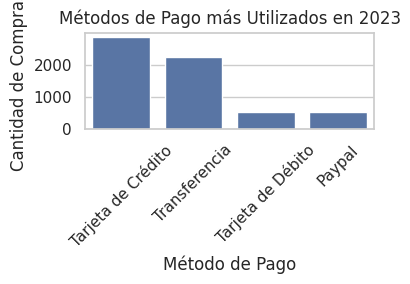

In [42]:
# Estilo base
sns.set(style="whitegrid")

#1. Conteo de métodos de pago
plt.figure(figsize=(4,3))
sns.countplot(data=df_unido, x='metodo_pago', order=df_unido['metodo_pago'].value_counts().index)
plt.title("Métodos de Pago más Utilizados en 2023")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Compras")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

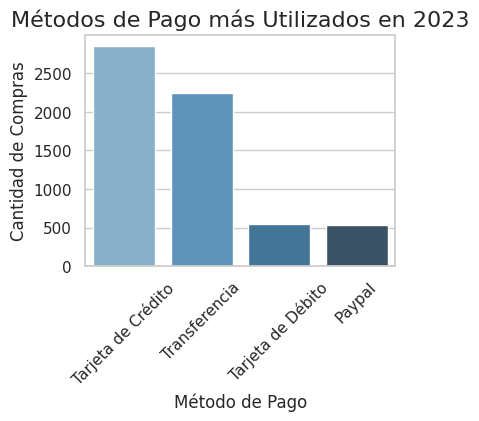

In [41]:
# Conteo de métodos de pago - Otra forma de hacerlo:
plt.figure(figsize=(4,3))
sns.barplot(x='metodo_pago', y = 'cantidad', data = metodos_de_pago, palette = 'Blues_d')

#Añadir etiquetas y títulos
plt.title('Métodos de Pago más Utilizados en 2023', fontsize=16)
plt.xlabel("Método de Pago", fontsize=12)
plt.ylabel("Cantidad de Compras", fontsize=12)
plt.xticks(rotation=45)
#plt.tight_layout()

#Mostrar el gráfico
plt.show()

###2da pregunta: ¿Cuál fue la facturación por categoría en 2023?###

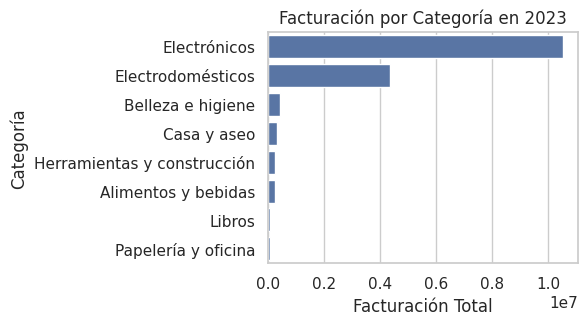

In [40]:
# 2. Facturación por categoría en 2023
df_unido['facturacion'] = df_unido['precio_unitario'] * df_unido['cantidad']
plt.figure(figsize=(4,3))
cat_facturacion = df_unido.groupby('categoria')['facturacion'].sum().sort_values(ascending=False)
sns.barplot(x=cat_facturacion.values, y=cat_facturacion.index)
plt.title("Facturación por Categoría en 2023")
plt.xlabel("Facturación Total")
plt.ylabel("Categoría")
plt.show()


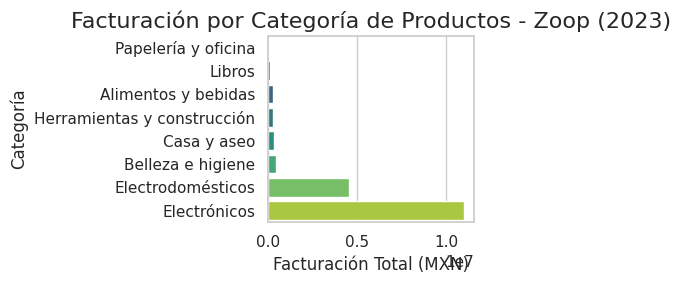

In [39]:
# Paso 1: Crear la columna de facturación total por fila o, dicho de otro modo, la facturación por cada compra
df_unido['facturacion'] = (df_unido['precio_unitario'] * df_unido['cantidad']) + df_unido['envio']

# Paso 2: Agrupar por categoría y sumar facturación
#A mi el ChatGPT me dijo que pusiera: facturacion_categoria = df_unido.groupby('categoria')['facturacion'].sum().sort_values()
#Según el instructor, es:
facturacion_categoria = df_unido.groupby('categoria')['facturacion'].sum().reset_index()       #Y yo lo puse así

#Paso 3: Ordenar los datos por facturación de mayor a menor:
facturacion_categoria = facturacion_categoria.sort_values(by='facturacion', ascending=True)

# Paso 4: Crear el gráfico de barras horizontales:
plt.figure(figsize=(5,3))
sns.barplot(x='facturacion', y='categoria', data=facturacion_categoria, palette="viridis", orient='h')

plt.title("Facturación por Categoría de Productos - Zoop (2023)", fontsize=16)
plt.xlabel("Facturación Total (MXN)", fontsize=12)
plt.ylabel("Categoría", fontsize=12)
plt.tight_layout()
plt.show()

###3ra pregunta: ¿Cómo fueron las ventas a lo largo de los meses en 2023?###

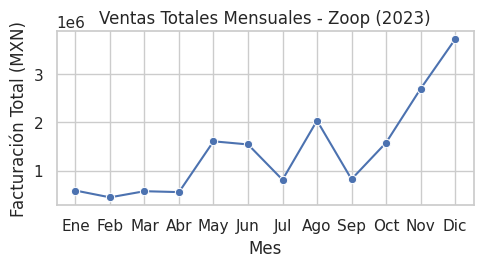

In [37]:
# Paso 1: Agrupar por mes y sumar la facturación
ventas_mensuales = df_unido.groupby(df_unido['fecha'].dt.month_name())['facturacion'].sum().reset_index()

# Paso 2: Traducir los nombres de los meses
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar', 'April': 'Abr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}
ventas_mensuales['mes'] = ventas_mensuales['fecha'].map(meses)

# Paso 3: Ordenar los datos en orden cronológico correcto
orden_cronologico = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
                     'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_mensuales['mes'] = pd.Categorical(ventas_mensuales['mes'], categories=orden_cronologico, ordered=True)
ventas_mensuales = ventas_mensuales.sort_values('mes')

# Paso 4: Graficar
plt.figure(figsize=(5,3))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o')
plt.title("Ventas Totales Mensuales - Zoop (2023)")
plt.xlabel("Mes")
plt.ylabel("Facturación Total (MXN)")
plt.tight_layout()
plt.show()

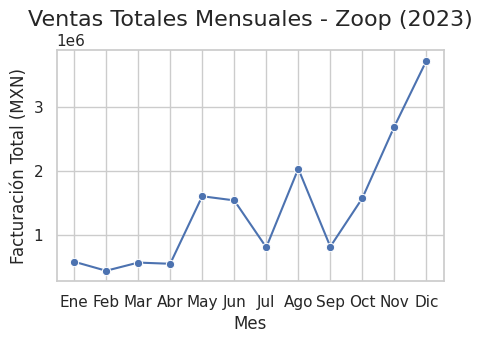

In [36]:
#Otra forma de hacerlo es:
#1: Crear una nueva columna 'mes' que extrae el mes de la columna 'fecha'
df_unido['mes'] = df_unido['fecha'].dt.month_name()
#2: Agrupar por mes y calcular la facturación total mensual
ventas_mensuales = df_unido.groupby(df_unido['fecha'].dt.to_period('M'))['facturacion'].sum().reset_index()
#3: Convertir el período de fecha a tipo datetime para mantener formato de fecha
ventas_mensuales['fecha'] = ventas_mensuales['fecha'].dt.to_timestamp()
#4: Crear una columna de nombre de mes en español usando el diccionario proporcionado.
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar', 'April': 'Abr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}
ventas_mensuales['mes'] = ventas_mensuales['fecha'].dt.month_name().map(meses)
#5: Crear el gráfico de línea de ventas mensuales.
plt.figure(figsize=(5,3))
sns.lineplot(x='mes', y='facturacion', data=ventas_mensuales, marker='o', sort=False)
#6: Añadir títulos y etiquetas
plt.title("Ventas Totales Mensuales - Zoop (2023)", fontsize=16)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Facturación Total (MXN)", fontsize=12)

plt.show()

##Componiendo datos dinámicos##

###4a Pregunta: ¿Cómo está dividida la venta por trimestre por método de pago? ¿Existe algún período en el que algún tipo de pago se destaque?###

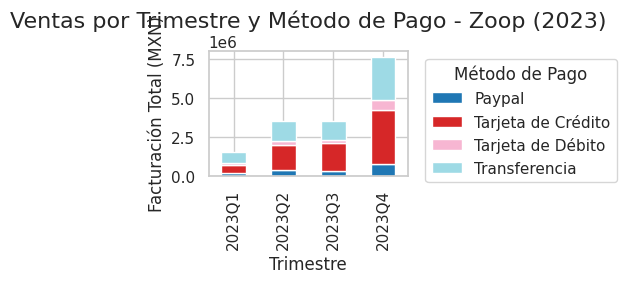

In [45]:
# Paso 1: Crear columna de trimestre
df_unido['trimestre'] = df_unido['fecha'].dt.to_period('Q').astype(str)

# Paso 2: Agrupar por trimestre y método de pago
ventas_trimestre_pago = df_unido.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack(fill_value=0)

# Paso 3: Gráfico de barras apiladas
ventas_trimestre_pago.plot(
    kind='bar',
    stacked=True,
    figsize=(5,3),
    colormap='tab20'
)

plt.title("Ventas por Trimestre y Método de Pago - Zoop (2023)", fontsize=16)
plt.xlabel("Trimestre", fontsize=12, )
plt.ylabel("Facturación Total (MXN)", fontsize=12)
plt.legend(title="Método de Pago", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Hay otra forma de hacerlo

In [96]:
#Previamente, hacer una tabla con los valores agrupados por trimeste y método de pago, sumando la facturación.
ventas_trimestre = df_unido.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum()
ventas_trimestre.unstack()

metodo_pago,Paypal,Tarjeta de Crédito,Tarjeta de Débito,Transferencia
trimestre,,,,
2023Q1,159392.78,567801.62,160984.48,716355.57
2023Q2,408176.22,1675152.84,271050.18,1351769.42
2023Q3,323562.78,1899375.64,166394.70,1280637.06
2023Q4,775944.52,3627098.81,683999.86,2911311.03


Ahora sí, al gráfico

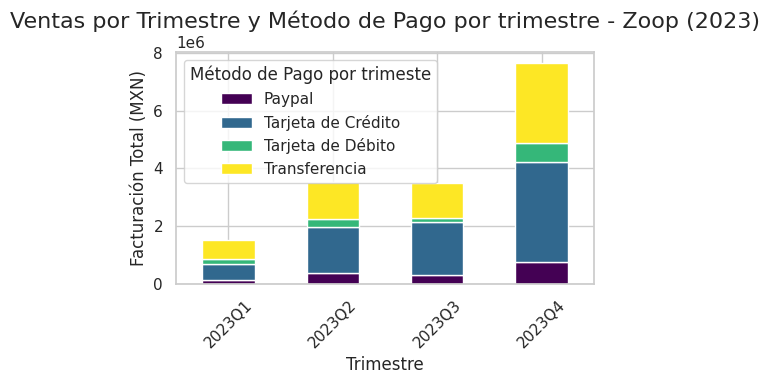

In [51]:
# 1: Crear columna trimestre que extrae el trimestre de la columna fecha.
df_unido['trimestre'] = df_unido['fecha'].dt.to_period('Q')  #.astype(str)

# 2: Agrupar por trimestre y método de pago, sumando la facturación
ventas_trimestre = df_unido.groupby(['trimestre', 'metodo_pago'])['facturacion'].sum().unstack()

# 3: Crear gráfico de barras apiladas
ventas_trimestre.plot(kind='bar', stacked=True, figsize=(5,4), colormap='viridis')

# 4: Añadir etiqueta y título
plt.title("Ventas por Trimestre y Método de Pago por trimestre - Zoop (2023)", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Facturación Total (MXN)", fontsize=12)
plt.xticks(rotation=45)

# Paso 5: Mostrar el gráfico
plt.legend(title="Método de Pago por trimeste")
plt.tight_layout()
plt.show()

##Componiendo datos estáticos##

###5ª Pregunta: ¿Cuál es la proporción de la clientela que participa en nuestro programa de cashback?###

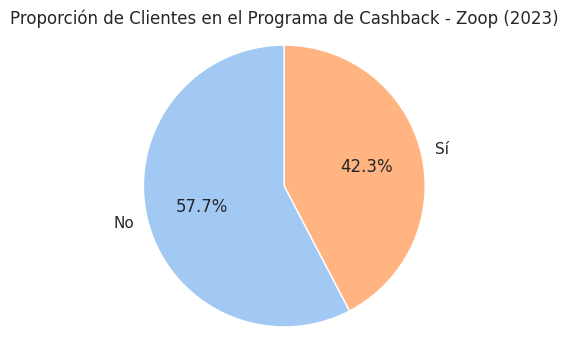

In [52]:
#Gráfico que muestra la proporción de usuarios que están participando en el programa de cashback de Zoop
# Paso 1: Calcular proporción de participación en cashback
participacion_cashback = df_unido['cashback'].value_counts()

# Paso 2: Gráfico de pastel (pie chart)
plt.figure(figsize=(4,4))
plt.pie(
    participacion_cashback,
    labels=participacion_cashback.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=90
)
plt.title("Proporción de Clientes en el Programa de Cashback - Zoop (2023)")
plt.axis('equal')  # Para que sea circular
plt.show()

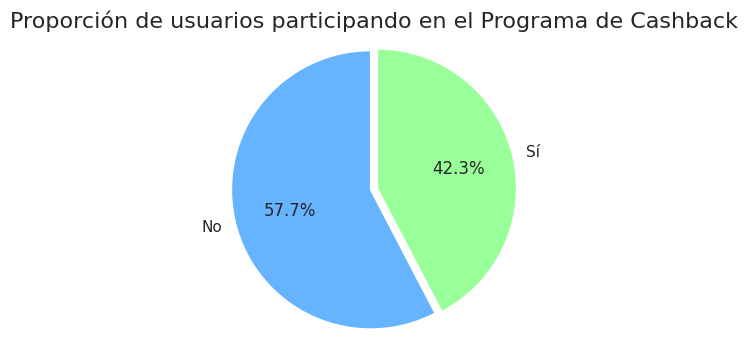

In [53]:
#Otra forma de hacerlo es:
#Contar la cantidad de usuarios que participan y que no participan en el programa de cashback.
cashback_proportion = df_unido['cashback'].value_counts()

#Crear el gráfico de torta.
plt.figure(figsize=(4,4))
plt.pie(cashback_proportion, labels=cashback_proportion.index, autopct='%1.1f%%', colors =['#66b3ff', '#99ff99'], startangle=90, explode=(0.05,0))

#Añadir título
plt.title('Proporción de usuarios participando en el Programa de Cashback', fontsize=16)

#Mostrar el gráfico.
plt.axis('equal') #asegura que el gráfico sea un círculo
plt.show()

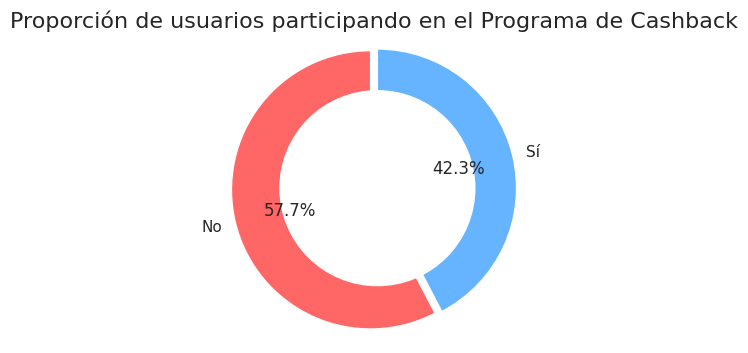

In [54]:
#Cambiar de tipo de gráfico: Utiliza cambiar el gráfico anterior a uno tipo rosquilla;
# utilizar el color rojo para los que no están en cashback y azul para los que sí están en cashback

# Contar la cantidad de usuarios que participan y que no participan en el programa de cashback.
cashback_proportion = df_unido['cashback'].value_counts()

# Crear el gráfico de rosquilla (doughnut)
plt.figure(figsize=(4,4))
wedges, texts, autotexts = plt.pie(cashback_proportion, labels=cashback_proportion.index, autopct='%1.1f%%',
                                    colors=['#ff6666','#66b3ff'],  # azul = sí, rojo = no
                                    startangle=90, explode=(0.05, 0)
)

# Dibujar un círculo en el centro para convertirlo en rosquilla
centro = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centro)

# Añadir título
plt.title('Proporción de usuarios participando en el Programa de Cashback', fontsize=16)

# Asegurar que sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

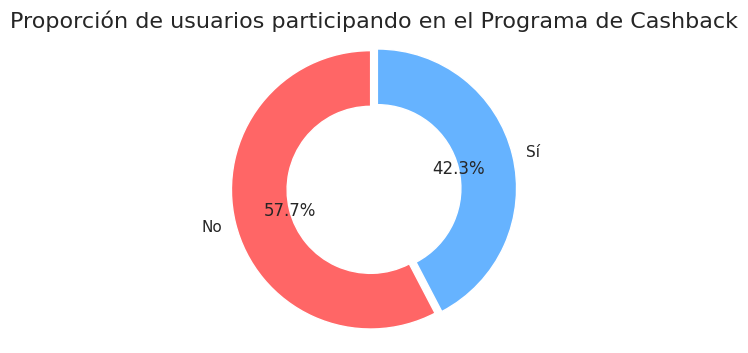

In [55]:
#Otra forma de hacerlo:
plt.figure(figsize=(4,4))
plt.pie(cashback_proportion, labels=cashback_proportion.index, autopct='%1.1f%%', colors =['#ff6666', '#66b3ff'], startangle=90, explode=(0.05,0), wedgeprops={'width':0.4})

#Añadir título:
plt.title('Proporción de usuarios participando en el Programa de Cashback', fontsize=16)

#Mostrar el gráfico:
plt.axis('equal')
plt.show()




##Distribuyendo Datos - Graficos de Distribución##

###6ª Pregunta: ¿Cómo están distribuidas las calificaciones de la compra? ¿Tenemos buenos números en general?###

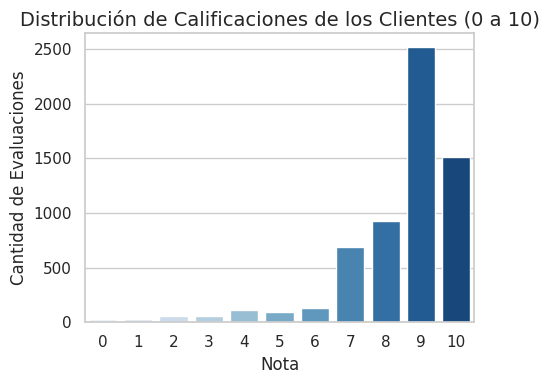

In [56]:
#Para visualizar la distribución de las calificaciones (columna nota), una de las mejores opciones es un histograma o un gráfico de barras si los valores son discretos como en este caso (de 0 a 10).
# Crear gráfico de barras para mostrar la distribución de notas
plt.figure(figsize=(5,4))
sns.countplot(data=df_unido, x='nota', palette='Blues')

# Título y etiquetas
plt.title('Distribución de Calificaciones de los Clientes (0 a 10)', fontsize=14)
plt.xlabel('Nota')
plt.ylabel('Cantidad de Evaluaciones')
plt.xticks(range(0, 11))  # Asegura que se muestren todos los valores de 0 a 10
plt.tight_layout()
plt.show()

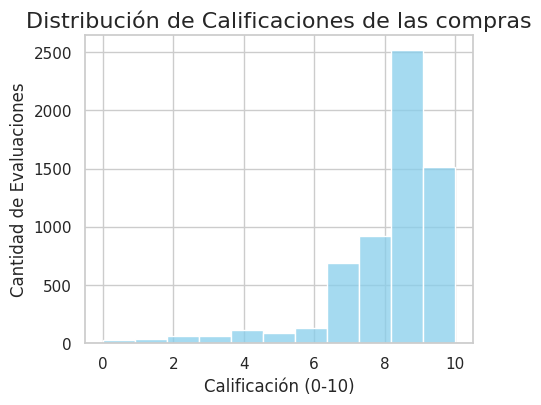

In [57]:
#Otra forma de hacerlo:
#1. Configure el tamaño del gráfico.
plt.figure(figsize=(5,4))

#2. Crear el gráfico de distribución (histograma):
sns.histplot(df_unido['nota'], bins=11, kde=False, color='skyblue')

#3. Añadir título y etiquetas:
plt.title('Distribución de Calificaciones de las compras', fontsize=16)
plt.xlabel('Calificación (0-10)', fontsize= 12)
plt.ylabel('Cantidad de Evaluaciones', fontsize= 12)

#4. Mostrar el gráfico:
plt.show()

###7ª Pregunta: ¿Cómo está distribuida nuestra audiencia por edad y sexo biológico? ¿Existe algún grupo que sobresalga?###

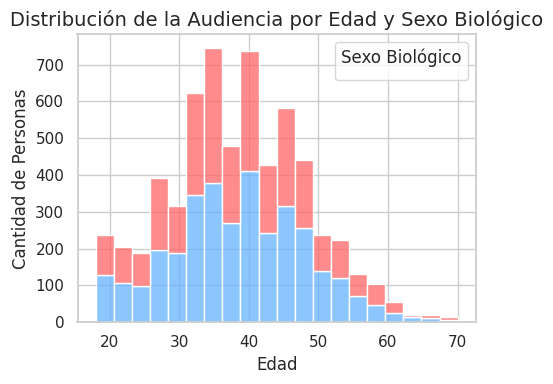

In [46]:
# Crear histograma de distribución de edad por sexo biológico
plt.figure(figsize=(5,4))
sns.histplot(
    data=df_unido,
    x='edad',
    hue='sexo_biologico',
    multiple='stack',
    palette={'Femenino': '#66b3ff', 'Masculino': '#ff6666'},
    bins=20
)

# Títulos y etiquetas
plt.title('Distribución de la Audiencia por Edad y Sexo Biológico', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Sexo Biológico')
plt.tight_layout()
plt.show()


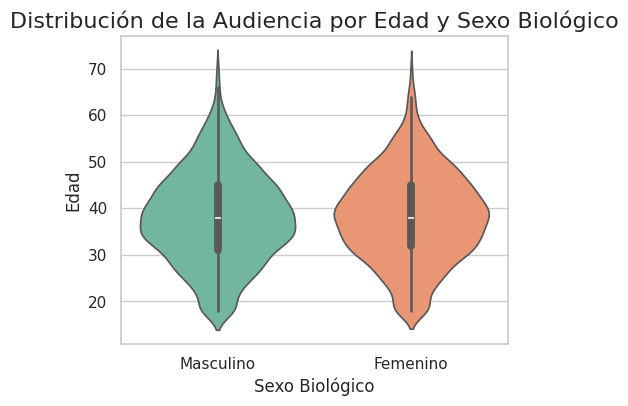

In [47]:
#Otra forma: Con un gráfico de violín.
plt.figure(figsize=(5,4))

#Crear un gráfico de violín:
sns.violinplot(data=df_unido, x='sexo_biologico', y='edad', palette='Set2')

#Agregar título y etiquetas
plt.title('Distribución de la Audiencia por Edad y Sexo Biológico', fontsize=16)
plt.xlabel('Sexo Biológico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

#Mostrar
plt.show()

Este gráfico es poco útil y difícil de leer. El instructor tiene otra idea. Poner boxplot.

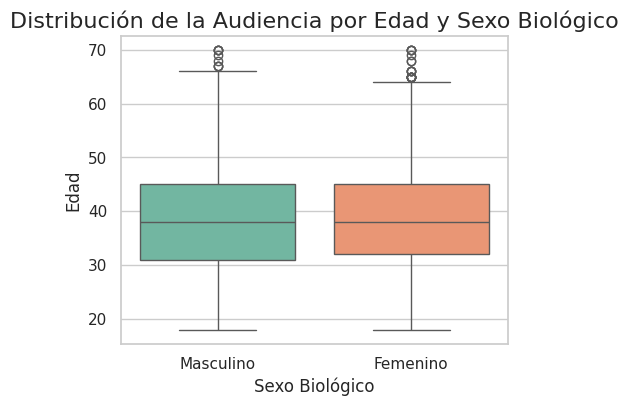

In [48]:
#Crear un gráfico de boxplot:
plt.figure(figsize=(5,4))

sns.boxplot(data=df_unido, x='sexo_biologico', y='edad', palette='Set2')

#Agregar título y etiquetas
plt.title('Distribución de la Audiencia por Edad y Sexo Biológico', fontsize=16)
plt.xlabel('Sexo Biológico', fontsize=12)
plt.ylabel('Edad', fontsize=12)

#Mostrar
plt.show()


##Definiendo los colores del proyecto##

In [58]:
# Adicionamos los colores al proyecto
ROJO_1,	ROJO_2,	ROJO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BLANCO,GRIS_1, GRIS_2, GRIS_3, GRIS_4,	GRIS_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

Ahora llegó el momento de refinar nuestras visualizaciones. Comencemos con el primer gráfico que hicimos, el de los métodos de pago.

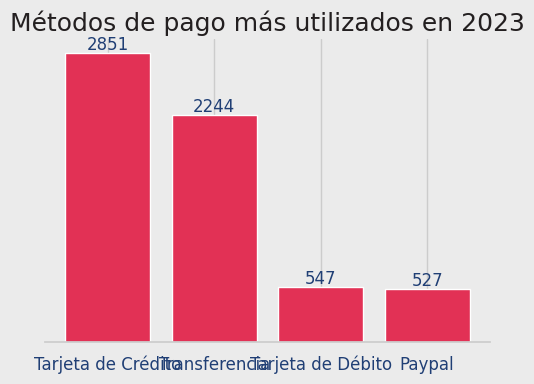

In [60]:
# Contar métodos de pago
metodos_pago = df_unido['metodo_pago'].value_counts()

# Crear la figura
fig, ax = plt.subplots(figsize=(5,4), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Crear gráfico de barras con estilo de Zoop
barras = ax.bar(metodos_pago.index, metodos_pago.values, color=ROJO_1)

# Título
ax.set_title('Métodos de pago más utilizados en 2023', fontsize=18, color=GRIS_5)

# Eliminar etiquetas del eje Y
ax.set_ylabel('')
ax.set_yticks([])

# Estilizar eje X
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Eliminar bordes superior, derecho e izquierdo
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Añadir etiquetas sobre cada barra
for bar in barras:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + max(metodos_pago.values)*0.01,
        f'{int(altura)}',
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

# Mostrar gráfico
plt.tight_layout()
plt.show()

##Añadiendo textos##

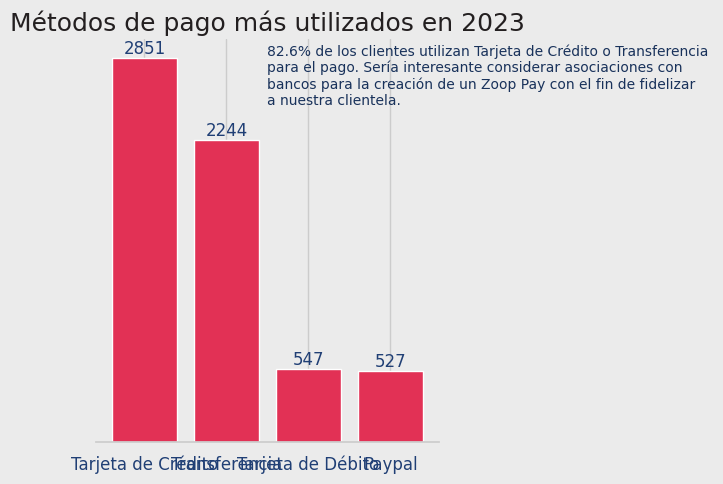

In [62]:
# Contar métodos de pago
metodos_pago = df_unido['metodo_pago'].value_counts()

# Calcular el porcentaje de las dos primeras categorías (Tarjeta de Crédito + Transferencia)
top2_suma = metodos_pago.iloc[0] + metodos_pago.iloc[1]
total_suma = metodos_pago.sum()
porcentaje = (top2_suma / total_suma) * 100

# Crear la figura
fig, ax = plt.subplots(figsize=(6,5), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Crear gráfico de barras
barras = ax.bar(metodos_pago.index, metodos_pago.values, color=ROJO_1)

# Título
ax.set_title('Métodos de pago más utilizados en 2023', fontsize=18, color=GRIS_5)

# Eje Y
ax.set_ylabel('')
ax.set_yticks([])

# Eje X
ax.set_xlabel('')
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Eliminar bordes no deseados
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# Etiquetas sobre las barras
for bar in barras:
    altura = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        altura + max(metodos_pago.values) * 0.01,
        f'{int(altura)}',
        ha='center',
        fontsize=12,
        color=AZUL_1
    )

# Añadir texto contextual dentro del gráfico
ax.text(
    1.5,
    2500,
    f"{porcentaje:.1f}% de los clientes utilizan Tarjeta de Crédito o Transferencia \npara el pago. Sería interesante considerar asociaciones con \nbancos para la creación de un Zoop Pay con el fin de fidelizar \na nuestra clientela.",
    fontsize=10,
    color=AZUL_3
)

# Mostrar gráfico
plt.tight_layout()
plt.show()

##Agregar elementos visuales##
Agregando elementos al gráfico de línea de ventas mensuales.
Este cambio no puede hacerse directammente sobre seaborne.

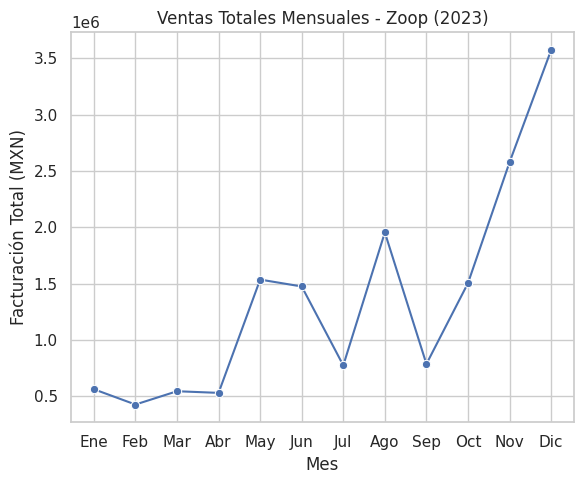

In [63]:
# Paso 1: Agrupar por mes y sumar la facturación
ventas_mensuales = df_unido.groupby(df_unido['fecha'].dt.month_name())['facturacion'].sum().reset_index()

# Paso 2: Traducir los nombres de los meses
meses = {
    'January': 'Ene', 'February': 'Feb', 'March': 'Mar', 'April': 'Abr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dic'
}
ventas_mensuales['mes'] = ventas_mensuales['fecha'].map(meses)

# Paso 3: Ordenar los datos en orden cronológico correcto
orden_cronologico = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul',
                     'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
ventas_mensuales['mes'] = pd.Categorical(ventas_mensuales['mes'], categories=orden_cronologico, ordered=True)
ventas_mensuales = ventas_mensuales.sort_values('mes')

# Paso 4: Crear gráfico de línea de las ventas mensuales.
plt.figure(figsize=(6,5))
sns.lineplot(data=ventas_mensuales, x='mes', y='facturacion', marker='o')

plt.title("Ventas Totales Mensuales - Zoop (2023)")
plt.xlabel("Mes")
plt.ylabel("Facturación Total (MXN)")
plt.tight_layout()
plt.show()

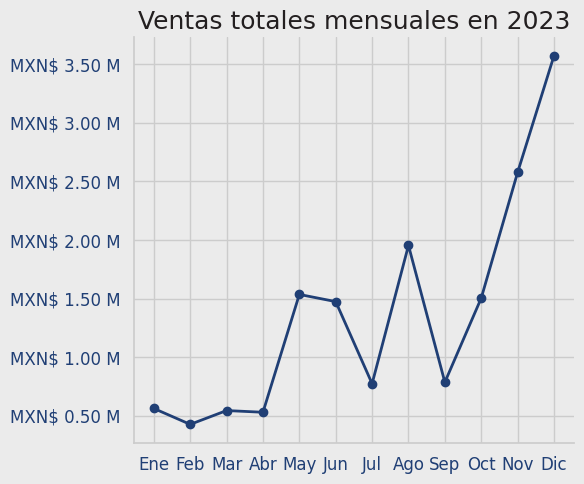

In [64]:
import matplotlib.ticker as mtick

# Definir los colores corporativos de Zoop
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# Diccionario de meses en inglés a español
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Crear columna de nombre de mes
df_unido['mes'] = df_unido['fecha'].dt.strftime('%B')

# Agrupar ventas por mes y reordenar
ventas_mensuales = df_unido.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Iniciar figura y configurar fondo
fig, ax = plt.subplots(figsize=(6,5), facecolor=GRIS_1)
ax.set_facecolor(GRIS_1)

# Crear gráfico de línea
plt.plot(list(meses.values()), ventas_mensuales.values, marker='o', color=AZUL_1, linewidth=2)

# Configurar título
ax.set_title('Ventas totales mensuales en 2023', fontsize=18, color=GRIS_5)

# Etiquetas eje X
ax.tick_params(axis='x', labelsize=12, colors=AZUL_1)

# Etiquetas eje Y con formato MXN$ X.XX M
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M'))

# Suprimir etiquetas de ejes
ax.set_xlabel('')
ax.set_ylabel('')

# Eliminar bordes superior y derecho
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Mostrar gráfico
plt.tight_layout()
plt.show()


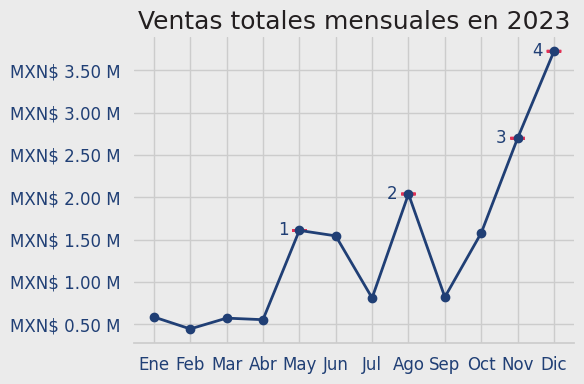

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Circle

# Definir los colores corporativos de Zoop
ROJO_1, ROJO_2, ROJO_3 = "#e23155", "#cc2c4e", "#b32742"
AZUL_1, AZUL_2, AZUL_3 = "#203f75", "#1c3867", "#19325b"
BLANCO, GRIS_1, GRIS_2, GRIS_3, GRIS_4, GRIS_5 = "#ffffff", "#ebebeb", "#d9d9d9", "#cccccc", "#555655", "#231f20"
AQUA_1, AQUA_2, AQUA_3 = "#addcd4", "#9fccc5", "#96bfb9"

# Diccionario de meses en inglés a español
meses = {
    'January': 'Ene',
    'February': 'Feb',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'May',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Sep',
    'October': 'Oct',
    'November': 'Nov',
    'December': 'Dic'
}

# Asegurar que 'fecha' es datetime
df_unido['fecha'] = pd.to_datetime(df_unido['fecha'])

# Calcular facturación
df_unido['facturacion'] = df_unido['precio_unitario'] * df_unido['cantidad'] + df_unido['envio']

# Crear columna de mes en texto
df_unido['mes'] = df_unido['fecha'].dt.strftime('%B')

# Agrupar y reordenar
ventas_mensuales = df_unido.groupby('mes')['facturacion'].sum().reindex(meses.keys())

# Coordenadas x e y
x_vals = list(range(len(ventas_mensuales)))
y_vals = ventas_mensuales.values
month_labels = [meses[mes] for mes in ventas_mensuales.index]

# Crear figura
fig, ax = plt.subplots(figsize=(6,4), facecolor=GRIS_1)
fig.patch.set_facecolor(GRIS_1)
ax.set_facecolor(GRIS_1)

# Graficar línea
ax.plot(x_vals, y_vals, marker='o', color=AZUL_1, linewidth=2)

# Título
ax.set_title("Ventas totales mensuales en 2023", fontsize=18, color=GRIS_5)

# Formato eje y
formatter = mtick.FuncFormatter(lambda x, _: f'MXN$ {x/1e6:.2f} M')
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis='y', labelsize=12, colors=AZUL_1)

# Eje x con etiquetas personalizadas
ax.set_xticks(x_vals)
ax.set_xticklabels(month_labels, fontsize=12, color=AZUL_1)
ax.set_xlabel('')
ax.set_ylabel('')

# Quitar bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Líneas guía horizontales
#ax.grid(axis='y', color=GRIS_2, linestyle='-', linewidth=0.5)

# Añadir círculos en puntos 5º, 8º, 11º y 12º (índices 4, 7, 10, 11)
indices = [4, 7, 10, 11]
for i, idx in enumerate(indices):
    # Dibujar círculo
    circle = Circle((x_vals[idx], y_vals[idx]), radius=0.2,
                    edgecolor=ROJO_1, facecolor='none', lw=2, transform=ax.transData)
    ax.add_patch(circle)

    # Número a la izquierda
    ax.text(x_vals[idx] - 0.3, y_vals[idx] + 2.50, str(i + 1),
            fontsize=12, color=AZUL_1, ha='right', va='center')

# Mostrar
plt.tight_layout()
plt.show()